#### **EDA (Exploración y Analisis de los Datos)**
**Se inicializa el proceso con la importación de los archivos procesados y almacenados en formato parquet resultantes del ETL**

Revisiones previas a los dataframe:
- Dimensiones y tipos de datos: Se ha validado las dimensiones de cada dataframe y los tipos de datos allí contenidos.
        •   Los dataframe del proyecto tienen dataframes que van desde las 43 hsta las 18884 filas y de las 5 a las 25 columnas
        •   Los dos dataframe mas grandes, con dimensiones de 43x25 y 1032x21, tienen campos con 1 nulo y de 24 a 32 nulos respectivamete, su impacto es inferior al 1% en el primer caso por lo cual no se le realiza imputación alguna, en el caso del segunda dataframe donde el impacto llegaría maximo al  3,1% de su cantidad de datos por campo entonces se le realiza imputacion a su media aritmetica ya que obedece a campos realacionados con accesos y velocidades de internet.
	    •	La revision de los tipos de valores de cada campo ya se habia realizado en el ETL sin embargo se corrobora Revisar los tipos de datos (numéricos, categóricos, fechas, booleanos, etc.) para confirmar que estén alineados con lo esperado tras el ETL.

    | Campo                            | Tipo de Dato | Tipo Variable        | Descripción                                          |
    |----------------------------------|--------------|----------------------|------------------------------------------------------|
    | Año                              | Int64        | Numérica discreta    | Año en formato entero (ej. 2019)                     |
    | Trimestre                        | Int64        | Numérica discreta    | Trimestre del año (1, 2, 3, 4)                       |
    | Provincia                        | category     | Categórica nominal   | Nombre de la Provincia                               |
    | "campos asociados a velocidades" | float64      | Numérica continua    | Velocidad promedio de bajada en Mbps                 |
    | "Campos asociados a accesos"     | float64      | Numérica continua    | Cantidad de accesos a Internet                       |
    | Periodo                          | category     | Categórica ordinal   | Trimestre representado en Año y meses comprendidos   |
    | Ingresos                         | float64      | Numérica continua    | Dinero generado en Ingresos                          |      

- Valores nulos y duplicados: Se descarta duplicidad en los datos Categoricos de las Provincias, en el caso de los datos nulos son pocas las ocurrencias por lo cual para el EDA no impactaría o afectaria el analisis.

In [17]:
import pandas as pd
from functions import *
opciones_impresion() # Invocar la función para mejorar la impresion y que no se recorte la información al imprimir.

# Se inicializa el proceso con la importación de los archivos parquet resultantes del ETL:

df_internet_nacional = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_nacional.parquet')
df_internet_provincias = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_provincias.parquet')
df_internet_Acc_vel_loc_sinrangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Acc_vel_loc_sinrangos.parquet')
df_internet_Velocidad_sin_Rangos = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Velocidad_sin_Rangos.parquet')
df_internet_Dial_BAf = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_Dial_BAf.parquet')

print("El dataframe {} tiene una dimensión de: {}".format("df_internet_nacional", df_internet_nacional.shape),"\n",validar_df(df_internet_nacional),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_provincias", df_internet_provincias.shape),"\n",validar_df(df_internet_provincias),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Acc_vel_loc_sinrangos", df_internet_Acc_vel_loc_sinrangos.shape),"\n",validar_df(df_internet_Acc_vel_loc_sinrangos),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Velocidad_sin_Rangos", df_internet_Velocidad_sin_Rangos.shape),"\n",validar_df(df_internet_Velocidad_sin_Rangos),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_Dial_BAf", df_internet_Dial_BAf.shape),"\n",validar_df(df_internet_Dial_BAf))


El dataframe df_internet_nacional tiene una dimensión de: (43, 25) 
                             Tipo de Dato Int Int64 Float Bool DateT Str Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media            Desviación_Std   Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos
Año                             int64     43  0      0    0    0      0  NaN    43       0     12       0   NaN                 2019.093023         3.734103           2014          2016.0           2019.0           2021.5          2033    0     
Trimestre                       int64     43  0      0    0    0      0  NaN    43       0      4       0   NaN                    2.418605         1.138766              1             1.0              2.0              3.0             4    0     
Tot_Vel_Media_DL              float64      0  0     42    0    0      0  NaN    42       1     43       0   NaN                   39.334762        43.643195       3.617127        6.038428      

- Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov, Tot_Acc_ADSL_x_Prov, Tot_Acc_CaModem_x_Prov, Tot_Acc_FO_x_Prov, Tot_Acc_Wireless_x_Prov, Tot_Acc_Otros_x_Prov, Tot_Acc_x_Prov, Tot_pntrcion_x_c100_Habi_x_Prov, Tot_pntrcion_x_c100_Hoga_x_Prov, Tot_Acc_rango_0->512_kbps_x_Prov, Tot_Acc_rango_0.512->1_Mbps_x_Prov, Tot_Acc_rango_1->6_Mbps_x_Prov, Tot_Acc_rango_6->10_Mbps_x_Prov, Tot_Acc_rango_10->20_Mbps_x_Prov, Tot_Acc_rango_20->30_Mbps_x_Prov, Tot_Acc_rango_>30_Mbps_x_Prov, Tot_Acc_rango_Otros_Mbps_x_Prov, Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

In [ ]:
# Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov", "Tot_Acc_ADSL_x_Prov", 
# "Tot_Acc_CaModem_x_Prov", "Tot_Acc_FO_x_Prov", "Tot_Acc_Wireless_x_Prov", "Tot_Acc_Otros_x_Prov", 
# "Tot_Acc_x_Prov", "Tot_pntrcion_x_c100_Habi_x_Prov", "Tot_pntrcion_x_c100_Hoga_x_Prov", 
# "Tot_Acc_rango_0->512_kbps_x_Prov", "Tot_Acc_rango_0.512->1_Mbps_x_Prov", "Tot_Acc_rango_1->6_Mbps_x_Prov", 
# "Tot_Acc_rango_6->10_Mbps_x_Prov", "Tot_Acc_rango_10->20_Mbps_x_Prov", "Tot_Acc_rango_20->30_Mbps_x_Prov", 
# "Tot_Acc_rango_>30_Mbps_x_Prov", "Tot_Acc_rango_Otros_Mbps_x_Prov", "Tot_Acc_rango_Mbps_x_Prov" 
# en el dataframe "df_internet_provincias" a su media aritmetica respectivamente:

campos_a_imputar = [
    "Tot_Vel_Media_DL_Trim_x_Prov",
    "Tot_Acc_ADSL_x_Prov",
    "Tot_Acc_CaModem_x_Prov",
    "Tot_Acc_FO_x_Prov",
    "Tot_Acc_Wireless_x_Prov",
    "Tot_Acc_Otros_x_Prov",
    "Tot_Acc_x_Prov",
    "Tot_pntrcion_x_c100_Habi_x_Prov",
    "Tot_pntrcion_x_c100_Hoga_x_Prov",
    "Tot_Acc_rango_0->512_kbps_x_Prov",
    "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
    "Tot_Acc_rango_1->6_Mbps_x_Prov",
    "Tot_Acc_rango_6->10_Mbps_x_Prov",
    "Tot_Acc_rango_10->20_Mbps_x_Prov",
    "Tot_Acc_rango_20->30_Mbps_x_Prov",
    "Tot_Acc_rango_>30_Mbps_x_Prov",
    "Tot_Acc_rango_Otros_Mbps_x_Prov",
    "Tot_Acc_rango_Mbps_x_Prov"
]

df_internet_provincias = imputar_media(df_internet_provincias, campos_a_imputar)
print(validar_df(df_internet_provincias))

Tras la depuración de los datos proseguimos con la revisión en detalle del cotenido a nivel de datos y lo que representan para el analisis:

1. Revisión y limpieza de valores atípicos:
	-	Se identifican valores negativos en 4 datos del campo "Accesos" los cuales se imputan a valores positivos asumiendo pudo ser un error de digitación o carga, y considerando no se darian accesos negativos ya que eso obedeceria es a otro tipo de indicador asociado a bajas o shurn.

In [20]:
import time
# Imputamos los valores negativos en el campos "Accesos" del dataframe "df_internet_Acc_vel_loc_sinrangos" los cuales seran reemplazados por su valor absoluto:
valores_negativos = df_internet_Acc_vel_loc_sinrangos["Accesos"][df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0]
print("Valores negativos en 'Accesos':")
print(valores_negativos)
df_internet_Acc_vel_loc_sinrangos.loc[df_internet_Acc_vel_loc_sinrangos["Accesos"] < 0, "Accesos"] = df_internet_Acc_vel_loc_sinrangos["Accesos"].abs() # Reemplazamos por su valor absoluto.

Valores negativos en 'Accesos':
7172    -5582.0
7226     -590.0
10597    -830.0
12699      -1.0
Name: Accesos, dtype: float64


1. **Análisis de Series Temporales:**  
   	- Graficamos la evolución de variables clave como:
		- Velocidad a lo largo del tiempo, usando "Año" y "Trimestre".  
		- Accesos a lo largo del tiempo, usando "Año" y "Trimestre".
		- Penetración a lo largo del tiempo, usando "Año" y "Trimestre".
		- Tecnologías a lo largo del tiempo, usando "Año" y "Trimestre"
		
   	- Identificar tendencias, estacionalidad o cambios abruptos en el tiempo.
   	- Graficar la relación directa entre la velocidad y los accesos
	- Graficar la relación directa entre la velocidad y la penetración por provincia
	- Obtener la matriz de correlaciones




Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).


Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.



Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

-   Validamos sesgos en las variables numericas continuas con la tecnica de la medida estadística "skewness", que indica la asimetría de la distribución de los datos en un campo, para ello tenemos en cuenta:
    - *Skewness cercano a 0: La distribución es aproximadamente simétrica.*
    - *Skewness positivo: La distribución tiene una cola extendida hacia la derecha (más valores extremos altos).*
	- *Skewness negativo: La distribución tiene una cola extendida hacia la izquierda (más valores extremos bajos).*

In [ ]:
- Para el dataframe "df_internet_nacional" con los resulados obtenidos se identifica sesgo a la derecha para los campos:
    - Tot_Vel_Media_DL: skewness = 1.33, Tot_Acc_rango_0_512_kbps: skewness = 2.92, Tot_Acc_rango_0.512->1_Mbps: skewness = 1.08, Tot_Acc_rango_20->30_Mbps: skewness = 1.11, Ingresos (miles de pesos): skewness = 3.38, porque sus valores skewness son positivos y superiores a 1.
- Con los resulados obtenidos se identifica sesgo a la izquierda para los campos:
    - Tot_Acc_rango_6->10_Mbps: skewness = -1.29, porque su valore skewness es negativo e inferios a -1
- Para el campo con el sesgo positivo mas marcado que corresponde a "Ingresos (miles de pesos)": skewness = 3.38 hacemos una transformación bajo las técnicas de Raiz Cuadrada y Logaritmica, luego comparamos visualmente su efecto:

In [ ]:
# Lista de columnas para validar la medida estadística "skewness":
columnas_continuas = [
    "Tot_Vel_Media_DL", "Tot_Acc_ADSL", "Tot_Acc_CaModem", "Tot_Acc_FO",
    "Tot_Acc_Wireless", "Tot_Acc_Otros", "Total",
    "Tot_pntrcion_x_c100_Hoga", "Tot_pntrcion_x_c100_Habi", "Tot_Acc_rango_0_512_kbps",
    "Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_1->6_Mbps", "Tot_Acc_rango_6->10_Mbps",
    "Tot_Acc_rango_10->20_Mbps", "Tot_Acc_rango_20->30_Mbps", "Tot_Acc_rango_>30_Mbps",
    "Tot_Acc_rango_Otros", "Tot_Acc_rango", "Tot_B_Ancha_Fija", "Tot_DialUp",
    "Tot_DialUp_+_B_Ancha_Fija", "Ingresos (miles de pesos)"
]
# Iterar sobre las columnas y calcular la medida estadística "skewness"
for col in columnas_continuas:
    if col in df_internet_nacional.columns:
        skew_val = df_internet_nacional[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

In [ ]:
from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_nacional, "Ingresos (miles de pesos)", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

In [ ]:
columnas_continuas = ["Velocidad (Mbps)"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Acc_vel_loc_sinrangos.columns:
        skew_val = df_internet_Acc_vel_loc_sinrangos[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

In [ ]:
columnas_continuas = ["Tot_B_Ancha_Fija_x_Prov","Tot_DialUp_x_Prov","Tot_DialUp_+_B_Ancha_Fija_x_Prov"] # Lista de columnas para validar la medida estadística "skewness":

for col in columnas_continuas:
    if col in df_internet_Dial_BAf.columns:
        skew_val = df_internet_Dial_BAf[col].skew()
        print(f"{col}: skewness = {skew_val:.2f}")

In [ ]:
from functions import * # Importar todas las funciones del módulo functions.py
# Hacemos transformacion Logaritmica y Raiz Cuadrada, luego comparamos el antes y despues con tres tecnicas de visualización:
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)
df_transformado = transformar_y_visualizar(df_internet_Dial_BAf, "Tot_DialUp_+_B_Ancha_Fija_x_Prov", 
                                             log_transform=True, sqrt_transform=False,
                                             mostrar_hist=True, mostrar_box=True, mostrar_qq=True)

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

Además de graficar la relación directa entre, por ejemplo, la velocidad y los accesos o la penetración por provincia y obtener la matriz de correlaciones, existen otras exploraciones y análisis de tendencias que pueden enriquecer el EDA:

1. **Análisis de Series Temporales:**  
   - Graficar la evolución de variables clave (velocidad, accesos, penetración) a lo largo del tiempo, usando "Año" y "Trimestre".  
   - Identificar tendencias, estacionalidad o cambios abruptos en el tiempo.

2. **Comparación por Categorías:**  
   - Utilizar boxplots o violin plots para comparar la distribución de variables numéricas (por ejemplo, accesos o velocidad) entre diferentes provincias o periodos.  
   - Analizar si existen diferencias significativas entre grupos (por ejemplo, comparar provincias de alta penetración versus baja penetración).

3. **Análisis Multivariado:**  
   - Realizar scatter plots con diferentes variables, añadiendo información adicional mediante el color o tamaño de los puntos (por ejemplo, usando "Periodo" o "Provincia" como dimensión adicional).  
   - Generar pair plots (gráficos de dispersión en matriz) para explorar las relaciones entre varias variables numéricas al mismo tiempo.

4. **Clusterización y Segmentación:**  
   - Aplicar técnicas de clustering (como k-means) para agrupar provincias o periodos según sus características (velocidad, accesos, penetración), lo que puede revelar patrones ocultos o segmentos de mercado.

5. **Análisis de Outliers y Distribución:**  
   - Más allá de las correlaciones, utilizar histogramas, boxplots y Q-Q plots para entender la distribución de cada variable, identificar outliers y evaluar la necesidad de transformaciones (por ejemplo, logarítmicas).

6. **Visualización Geográfica (si es posible):**  
   - Si dispones de datos de localización, mapear las provincias con indicadores como accesos o velocidades, lo que puede ayudar a identificar patrones geográficos o diferencias regionales.

7. **Modelos de Regresión Exploratorios:**  
   - Ajustar modelos de regresión simples o múltiples para explorar qué variables (por ejemplo, la velocidad o el tipo de conexión) explican mejor la variabilidad en el número de accesos o en la penetración.

Estas exploraciones adicionales te ayudarán a comprender mejor las relaciones subyacentes en tus datos y a identificar posibles áreas de mejora o nuevas oportunidades de análisis para la estrategia de la empresa en el sector de telecomunicaciones.

4. Conclusiones preliminares
	1.	Principales hallazgos
	    •	Provincias con mayor número de accesos.
	    •	Provincias con mayor velocidad media.
	    •	Evolución temporal de penetración, accesos, etc.
	2.	Problemas detectados
	    •	Columnas con muchos nulos.
	    •	Posibles valores atípicos o inconsistentes.
	    •	Variables que no aportan información o que podrían fusionarse.
	3.	Decisiones para el Dashboard
	    •	Identificar qué métricas se van a mostrar (velocidad, accesos, penetración, ingresos, etc.).
	    •	Definir filtros relevantes (por provincia, año, trimestre).

In [ ]:
asd

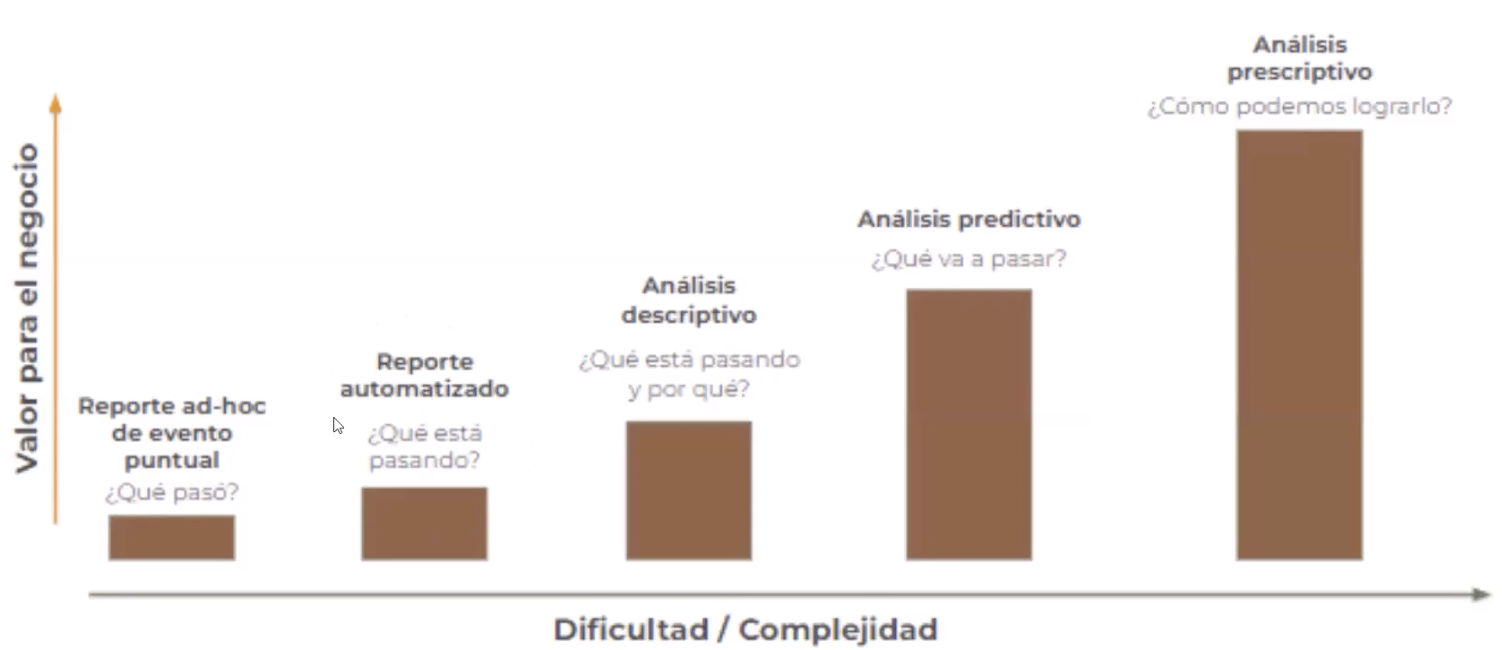

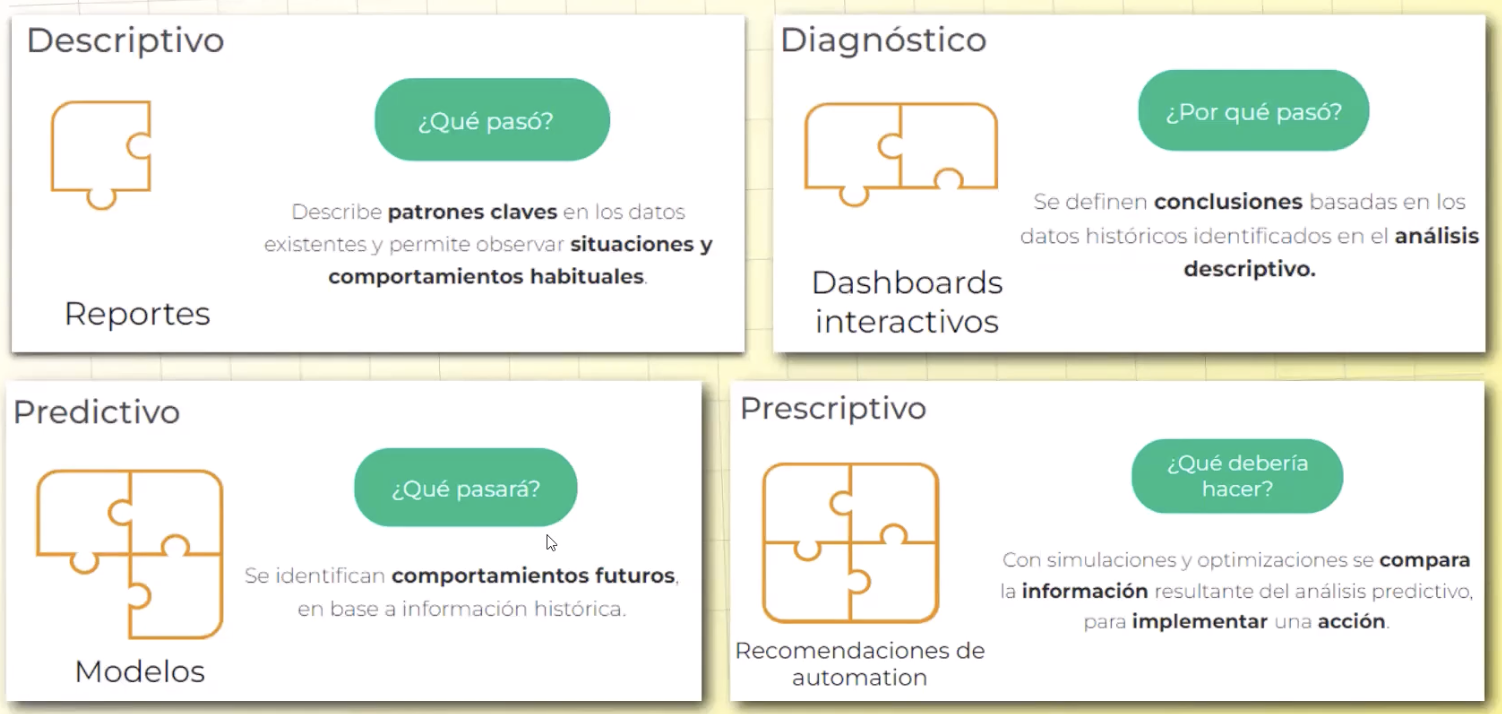